# QUETION2
## PART A

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = {'Output,Q': [80,150,135,165,95,130,110],
        'Labour,L': [60,100,100,120,70,90,80],
        'Capital,K': [50,100,80,100,60,80,70]}
df = pd.DataFrame(data, index = ['B','C','D','E','F','G','H'])
print(df)


   Output,Q  Labour,L  Capital,K
B        80        60         50
C       150       100        100
D       135       100         80
E       165       120        100
F        95        70         60
G       130        90         80
H       110        80         70


In [4]:
#mean of the data
df.mean()

Output,Q     123.571429
Labour,L      88.571429
Capital,K     77.142857
dtype: float64

In [5]:
#variance of the data
df.var()

Output,Q     914.285714
Labour,L     414.285714
Capital,K    357.142857
dtype: float64

In [6]:
#standard deviation of the data
df.std()

Output,Q     30.237158
Labour,L     20.354010
Capital,K    18.898224
dtype: float64

In [7]:
#median of the data
df.median()

Output,Q     130.0
Labour,L      90.0
Capital,K     80.0
dtype: float64

## part B

In [10]:
import seaborn as sns

In [11]:
x1 = df['Output,Q']
x2 = df['Labour,L']

Text(0, 0.5, 'density')

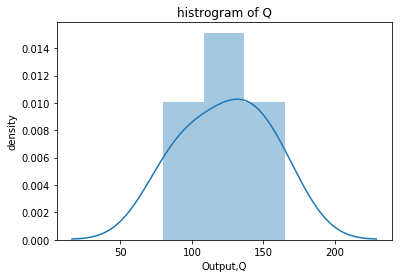

In [12]:
ax1 = sns.distplot(x1)
ax1.set_title('histrogram of Q')
ax1.set_ylabel('density')

Text(0, 0.5, 'density')

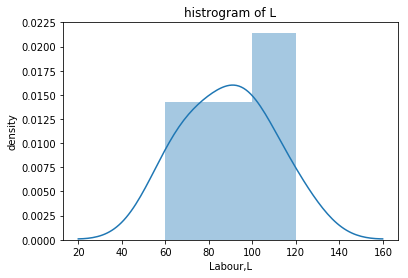

In [13]:
ax2=sns.distplot(x2)
ax2.set_title('histrogram of L')
ax2.set_ylabel('density')

## PART C

In [14]:
log_df = np.log(df)
print(log_df)


   Output,Q  Labour,L  Capital,K
B  4.382027  4.094345   3.912023
C  5.010635  4.605170   4.605170
D  4.905275  4.605170   4.382027
E  5.105945  4.787492   4.605170
F  4.553877  4.248495   4.094345
G  4.867534  4.499810   4.382027
H  4.700480  4.382027   4.248495


## PART D

In [15]:
x = log_df[['Labour,L','Capital,K']]
y = log_df['Output,Q']

In [16]:
import statsmodels.api as sm

In [17]:
X = sm.add_constant(x)
model1= sm.OLS(y,X).fit()

/Users/chenjie/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
predictions = model1.predict(X)
model1.summary()

/Users/chenjie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Output,Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        11:23:54   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.269      -0.170       0.463
Labour,L       0.5484      0.090      6.127      0.004       0.300       0.797
Capital,K      0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
0.5484+0.5087	

1.0571000000000002

##### α + β= 1.0571000000000002 
#####  THE SUM OF ALPHA AND BETA IS 1.0572. 
##### WHICH IS GREATER THAN ONE, SO THE MODEL IS NOT HOMOGENOUS OF DEGREE ONE. 

## PART E

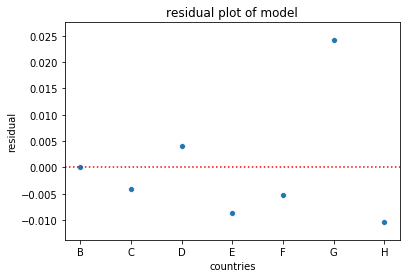

In [22]:
residual = y-predictions
index = ['B','C','D','E','F','G','H']
residualplot = sns.scatterplot(x = index, y=residual)
residualplot.set_title('residual plot of model')
residualplot.set_ylabel('residual')
residualplot.set_xlabel('countries')
plt.axhline(0,color='red',ls='dotted')

### part f

In [23]:
print('Adjusted R^2:', model1.rsquared_adj)

Adjusted R^2: 0.9968763418198051
